# Clustering / Introduction to unsupervised learning

Kind of primative algorithm compared to others.

Examples of usage:

1) **Segmentation of customers**: Special discounts, fraud and threat detection, completion lack of information, product suggestion etc.

2) **Segmentation of market**: behavioural, demographical, pyshcological, geographical etc. segmentations.

3) **Medical and image processing**

for short: **all** procedures done on subset of data.

In [1]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
# use musteriler.txt
uploaded = files.upload()

Saving musteriler.txt to musteriler.txt


In [4]:
data = pd.read_csv(io.BytesIO(uploaded['musteriler.txt']))
data.head()
# hacim is how much trade we done, maas is salary

,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450


# Clustering: K-Means Algorithm

Unlike previous supervised learning,men-woman examples, we don't know value of data point. They are all same and they do not give any information to us.

1) Algorithm need to take how many set should be (k value). Research subjects: which k value is best, X-means algorithm

2) Select at random positions, k many center points.

3) Every data point be appointed nearest centers' set.

4) For every set, new center points are calculated (like center of gravity) and new center points are created.

5) Repeat until becomes stable. 

---

Since center points taken as random, it can cause problems when clustering. To solve this issue k-means++ algorithm is developed.

---

We can select how many clusters (K) there should be using **WCSS** (within-cluster sums of squares) method. Method will try to minimize WCSS value and select that K value however method will create a cluster for each datapoint, since if each cluster is a datapoint, distance will be equal to 0 then WCSS will be equal to zero (overfitting).

By selecting knee point in WCSS-Number of Clusters(K) graph, we can overcome this issue.

Note: we use this method when K is unidentified. If we know for example, how many customer group we will create or due to hardware limitations, we don't need WCSS.

In [8]:
# age and hacim
X = data.iloc[:, 3:].values

In [16]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, init='k-means++')
kmeans.fit(X)

# print coordinates
print(kmeans.cluster_centers_)

[[ 58643.47826087   5844.92753623]
 [104386.95652174   7289.13043478]
 [ 22069.41176471   5320.88235294]]


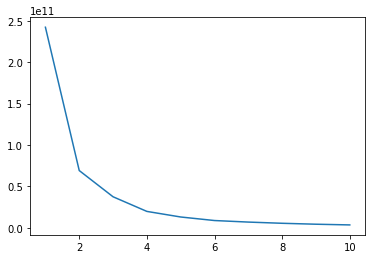

In [25]:
# Find optimum value for K using WCSS
results = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init='k-means++', random_state=123)
  kmeans.fit(X)
  # interia is WCSS value
  results.append(kmeans.inertia_)

# visualize WCSS values
plt.plot(range(1,11), results)

# from graph we can see that 4, 3 and 2 can be taken as K value

# Clustering: Hierarchical Clustering

- Agglomerative: Bottom Up Approach 

- Divisive: Top Down Approach

Explained in BTK 22.1 video.

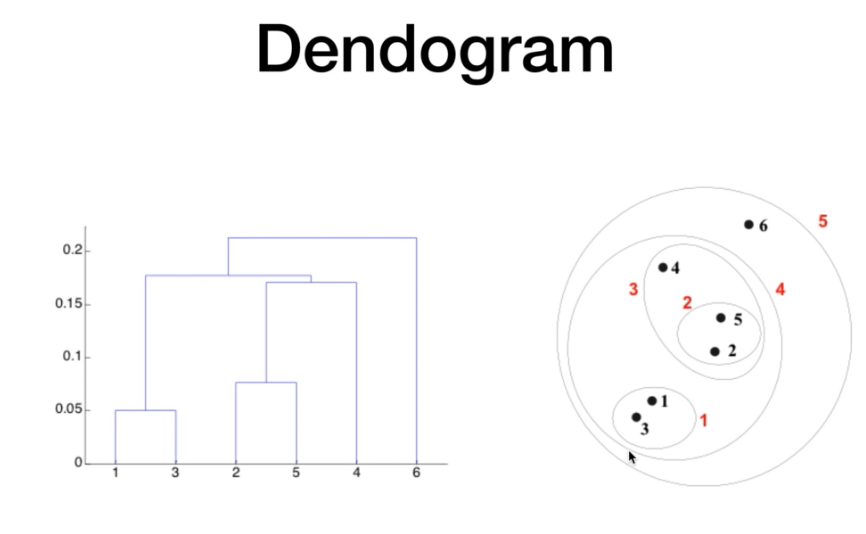

As we go higher in Y axis number clusters are created.